# Module 2 [NetworkX](https://networkx.github.io/) Tutorial 

The official documentation for NetworkX can be found [here](https://networkx.github.io/documentation/stable/).

In this tutorial, we will explore several community detection and link prediction methods.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

First, let's create a random graph with a three communities structure. This can be accomplished using [stochastic_block_model](https://networkx.org/documentation/stable/reference/generated/networkx.generators.community.stochastic_block_model.html?highlight=stochastic_block_model#networkx.generators.community.stochastic_block_model), which we will cover in a later module. The details of how the network is generated are not important for this module.

Put simply, we generate a graph such that nodes in the same community have a higher chance of forming an edge between one another than with nodes in different communities.



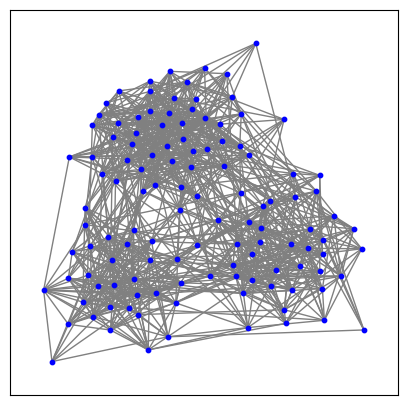

In [2]:
sizes = [50, 40, 30]
probs = [[0.25, 0.04, 0.03], [0.04, 0.3, 0.05], [0.03, 0.05, 0.40]]
G = nx.stochastic_block_model(sizes, probs, seed=0)
pos = nx.spring_layout(G)
plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color='blue', node_size=10,
                edge_color='grey', width=1)

Let's see how different community detection algorithms partition our graph. 

## Girvan–Newman

We can use different community detection algorithms to find a partition. For example, we can apply the [Girvan–Newman method](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html?highlight=girvan_newman#networkx.algorithms.community.centrality.girvan_newman),
```python
networkx.algorithms.community.centrality.girvan_newman(G, most_valuable_edge=None)
```
which returns a generator that produces partitions one at a time. We can retrieve a partition with the built-in function `next()` in Python. 

Let's get the first partition produced by Girvan-Newman:

In [3]:
generator = nx.algorithms.community.centrality.girvan_newman(G)
first_partition = next(generator)
len(first_partition)

2

In [4]:
print(first_partition)


({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119})


This partition divides the network into two communities. We can color the nodes by this partition to see the outcome. 

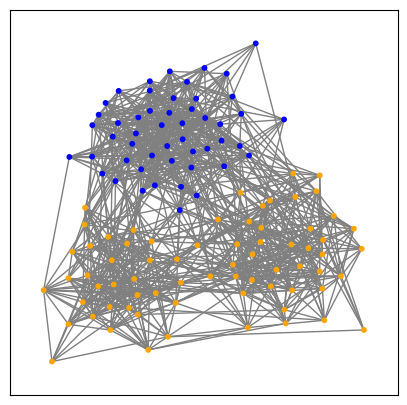

In [5]:
color_list = ['blue', 'orange']
node_color_list = [color_list[0] if i in first_partition[0] else color_list[1] for i in G.nodes]
plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color=node_color_list, node_size=10,
                edge_color='grey', width=1)

This partition has two communities, as we had configured. We can also generate the next partition to see what a third community would look like. 

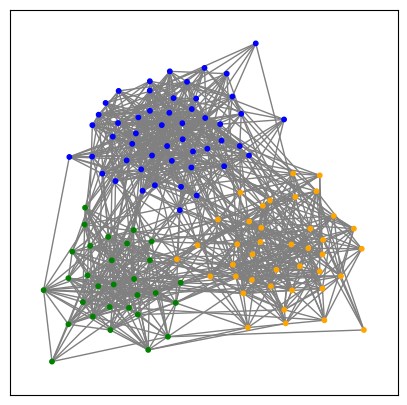

In [6]:
second_partition = next(generator)
color_list = ['blue', 'orange', 'green']
for i, v in enumerate(G.nodes):
    if v in second_partition[0]:
        node_color_list[i] = color_list[0]
    elif v in second_partition[1]:
        node_color_list[i] = color_list[1]
    else:
        node_color_list[i] = color_list[2]

plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color=node_color_list, node_size=10,
                edge_color='grey', width=1)

This graph shows 3 communities, as we'd configured. Let's see what the next partition looks like

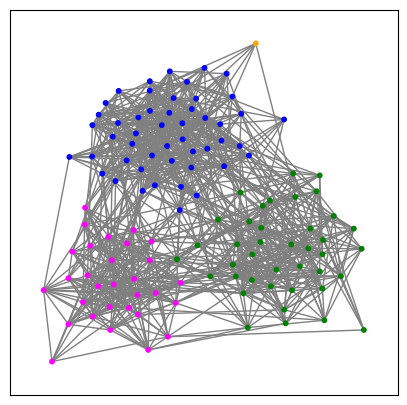

In [7]:
third_partition = next(generator)
color_list = ['blue', 'orange', 'green', 'magenta']
for i, v in enumerate(G.nodes):
    if v in third_partition[0]:
        node_color_list[i] = color_list[0]
    elif v in third_partition[1]:
        node_color_list[i] = color_list[1]
    elif v in third_partition[2]:
        node_color_list[i] = color_list[2]
    else:
        node_color_list[i] = color_list[3]

plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color=node_color_list, node_size=10,
                edge_color='grey', width=1)

Clearly, partitioning the network into 4 communities rather than 3 did not generate a better partition. We will compare the modularity values at the end. 

## Clauset-Newman-Moore

While the Girvan–Newman algorithm begins with a single community and creates partitions by removing edges with high betweenness centrality, Agglomerative Hierarchical Clustering begins with all nodes in their own community and merges pairs of communities that lead to a higher modularity score. 

The [Clauset-Newman-Moore](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html?highlight=greedy_modularity_communities#networkx.algorithms.community.modularity_max.greedy_modularity_communities) is one of such Agglomerative Hierarchical Clustering implementations. 

This method returns a list of Frozensets, which are immutable Python set objects (elements in the set cannot be modified).

In [8]:
gred_partition = nx.algorithms.community.greedy_modularity_communities(G)
len(gred_partition)

3

As you can see, the algorithm correctly identifies the number of communities. 

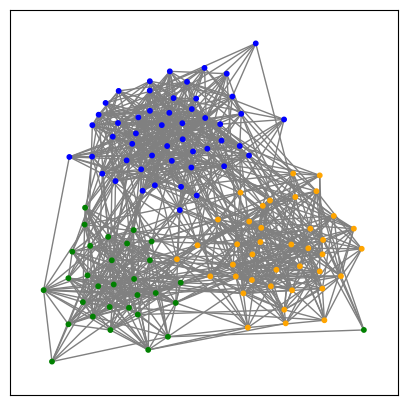

In [9]:
color_list = ['blue', 'orange', 'green']
for i, v in enumerate(G.nodes):
    if v in gred_partition[0]:
        node_color_list[i] = color_list[0]
    elif v in gred_partition[1]:
        node_color_list[i] = color_list[1]
    else:
        node_color_list[i] = color_list[2]

plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color=node_color_list, node_size=10,
                edge_color='gray', width=1)

## Label propagation

[label_propagation_communities](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html?highlight=label_propagation_communities#networkx.algorithms.community.label_propagation.label_propagation_communities) generates partitions using a label propagation algorithm. This function returns a generator as well, but each time the generator yields a set of nodes in the same group. We can convert the generator to a list of sets conveniently.

In [10]:
lp_generator = nx.algorithms.community.label_propagation.label_propagation_communities(G)
lp_partition = list(lp_generator)
len(lp_partition)

3

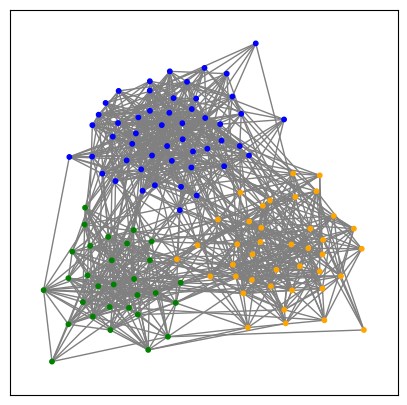

In [11]:
color_list = ['blue', 'orange', 'green']
for i, v in enumerate(G.nodes):
    if v in lp_partition[0]:
        node_color_list[i] = color_list[0]
    elif v in lp_partition[1]:
        node_color_list[i] = color_list[1]
    else:
        node_color_list[i] = color_list[2]

plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color=node_color_list, node_size=10,
                edge_color='grey', width=1)

## Fluid communities 

Note: We did not cover this in lecture. 

[This algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.asyn_fluid.asyn_fluidc.html#networkx.algorithms.community.asyn_fluid.asyn_fluidc) is influenced by the interactions of fluids in an environment. Initially,  𝑘  communities are assigned to  𝑘  different nodes with density 1. During each iteration, every node is assigned to the community with the maximum density shared among its neighbors. Then the density of this community is reassigned uniformly among its members. The algorithm stops when the labels of all nodes do not change in two consecutive rounds. Note that unlike the other algorithms, you must predetermine the number of communities with input parameter 𝑘. 



In [12]:
fluid_partition = list(nx.algorithms.community.asyn_fluidc(G, 3, max_iter=100, seed=42))
len(fluid_partition)

3

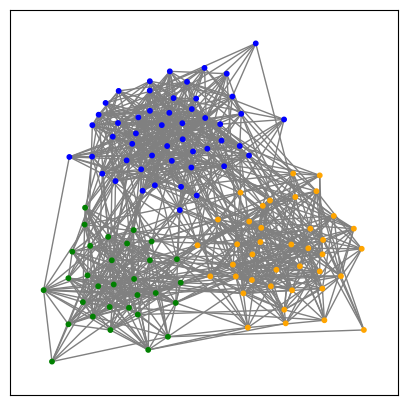

In [13]:
color_list = ['blue', 'orange', 'green']
for i, v in enumerate(G.nodes):
    if v in fluid_partition[0]:
        node_color_list[i] = color_list[0]
    elif v in fluid_partition[1]:
        node_color_list[i] = color_list[1]
    else:
        node_color_list[i] = color_list[2]

plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color=node_color_list, node_size=10,
                edge_color='grey', width=1)

## Evaluating a partition

In the previous sections, we introduced several community detection methods. However, how do we evaluate the quality of a partition?

[NetworkX provides a set of metrics](https://networkx.org/documentation/stable/reference/algorithms/community.html?highlight=modularity#module-networkx.algorithms.community.quality), which evaluate the goodness of a partition from different perspectives:

```python
networkx.algorithms.community.modularity(G, communities, weight='weight')
networkx.algorithms.community.partition_quality(G, partition)

```

For example, we can compute the modularity of the partition generated by the first three iterations of the Girvan-Newman algorithm:

In [14]:
nx.algorithms.community.modularity(G, first_partition)

0.3489270053955369

In [15]:
nx.algorithms.community.modularity(G, second_partition)

0.4501625996381241

In [16]:
nx.algorithms.community.modularity(G, third_partition)

0.44725699708217187

Let's compare the coverage and the performance of the partitions generated by Girvan-Newman and Clauset-Newman-Moore:

In [17]:
cov, perf = nx.algorithms.community.partition_quality(G, second_partition)
print(f'Girvan-Newman cov = {cov} \nGirvan-Newman per = {perf}')

Girvan-Newman cov = 0.7972027972027972 
Girvan-Newman per = 0.7296918767507002


In [18]:
cov, perf = nx.algorithms.community.partition_quality(G, gred_partition)
print(f'Clauset-Newman-Moore cov = {cov} \nClauset-Newman-Moore per = {perf}')

Clauset-Newman-Moore cov = 0.7937062937062938 
Clauset-Newman-Moore per = 0.7301120448179271


Let's compare the performance of partitions generated by the label propogation and fluid algorithms:

In [19]:
cov, perf = nx.algorithms.community.partition_quality(G, lp_partition)
print(f'label propogation cov = {cov} \nlabel propogation per = {perf}')

label propogation cov = 0.7972027972027972 
label propogation per = 0.7296918767507002


In [20]:
cov, perf = nx.algorithms.community.partition_quality(G, fluid_partition)
print(f'fluid_partition cov = {cov} \nfluid_partition per = {perf}')

fluid_partition cov = 0.796037296037296 
fluid_partition per = 0.730672268907563


# End